In [1]:
import numpy as np

import wandas as wd

# Make ChannelFrame from numpy array

In [2]:
fs = 44100
rand_signal = np.random.rand(2, fs) - 0.5
signal = wd.from_ndarray(rand_signal, sampling_rate=fs)
signal.describe()

# Make ChannelFrame using generate_sample 

In [3]:
# Generate a sample
signal = wd.generate_sin(freqs=[5000, 1000], duration=1, label="Original Signal")
signal.describe()

In [4]:
# Apply a low-pass filteXr
signal.low_pass_filter(cutoff=2000).describe()

(<Axes: title={'center': 'Channel 1'}, xlabel='Time [s]', ylabel='Amplitude [Pa]'>,
 array([ 0.        ,  2.61312593, -2.        , ...,  1.0823922 ,
         2.        , -2.61312593]))

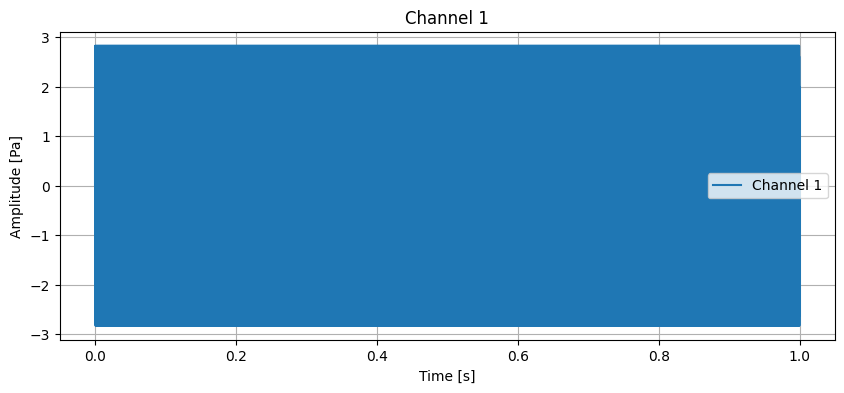

In [5]:
signal[0].plot()

(<Axes: title={'center': 'Channel 1'}, xlabel='Time [s]', ylabel='Amplitude [Pa]'>,
 array([ 0.        ,  2.61312593, -2.        , ...,  1.0823922 ,
         2.        , -2.61312593]))

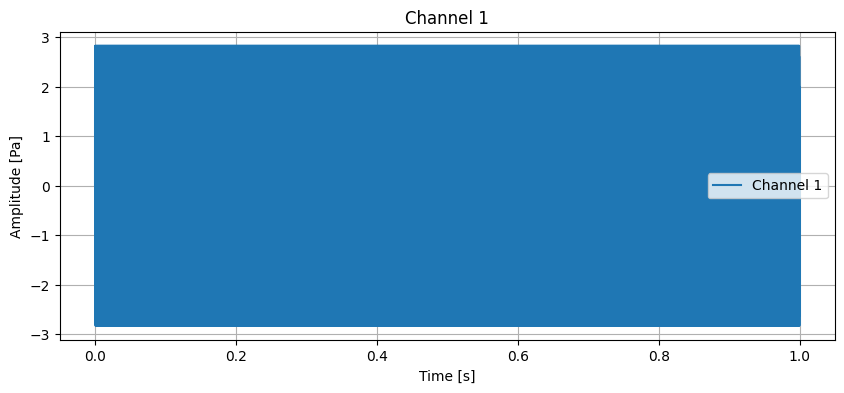

In [6]:
signal["Channel 1"].plot()

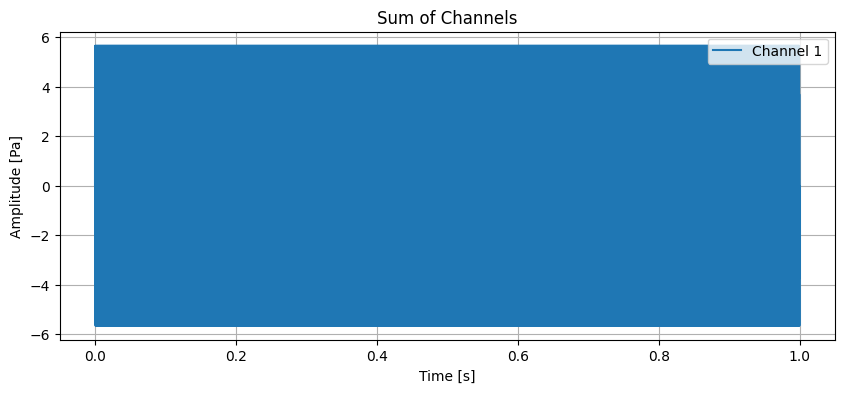

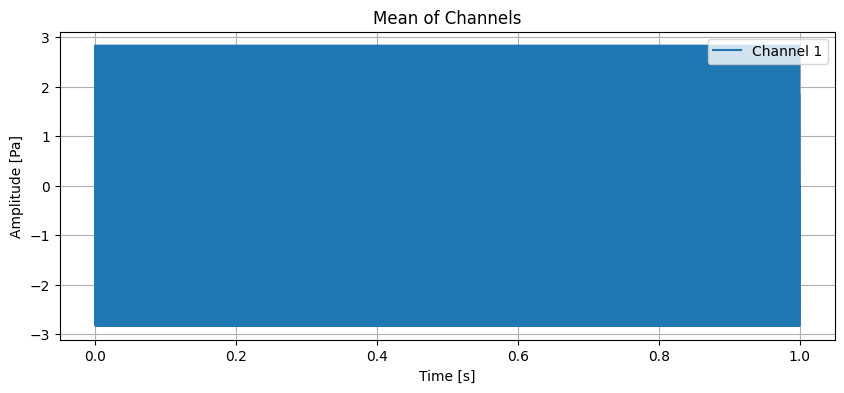

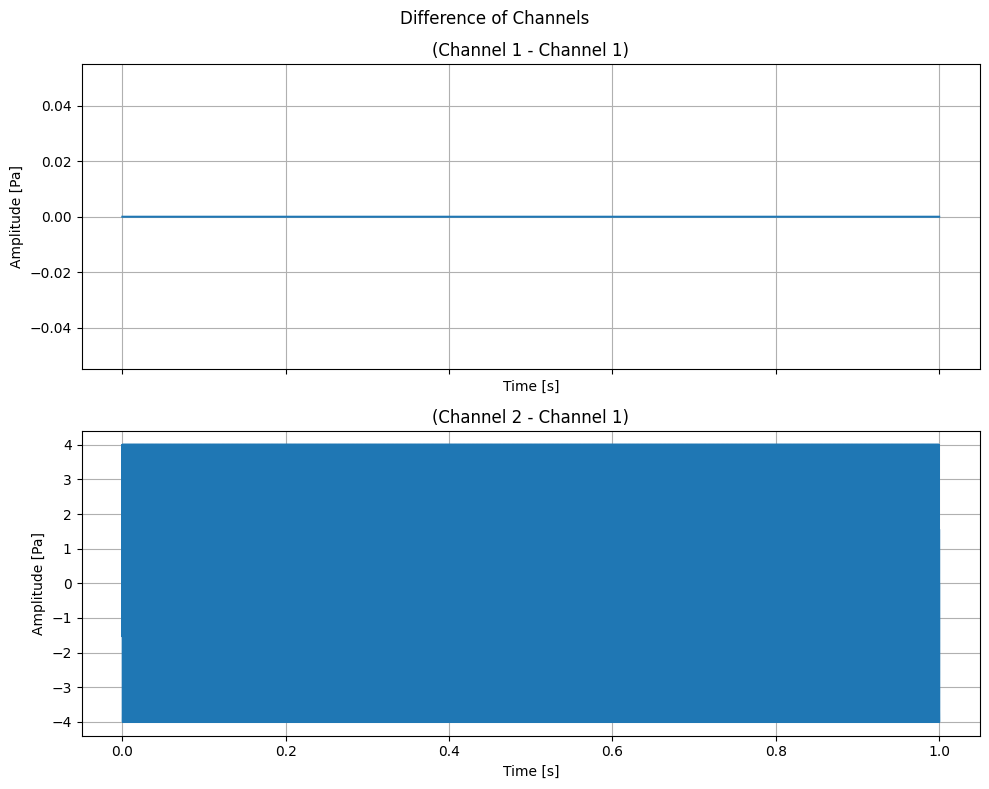

In [7]:
signal.sum().plot(title="Sum of Channels")
signal.mean().plot(title="Mean of Channels")
signal.channel_difference(other_channel=0).plot(
    title="Difference of Channels", overlay=False
)

<Figure size 640x480 with 0 Axes>

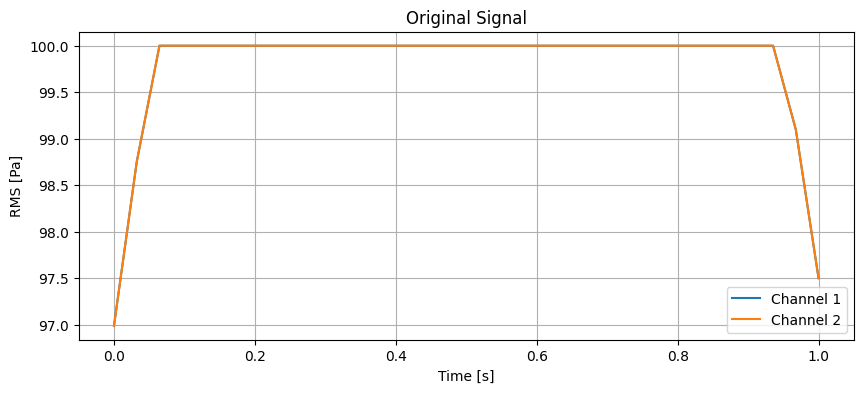

In [8]:
# Plot the signals
signal.rms_plot(title="Original Signal")

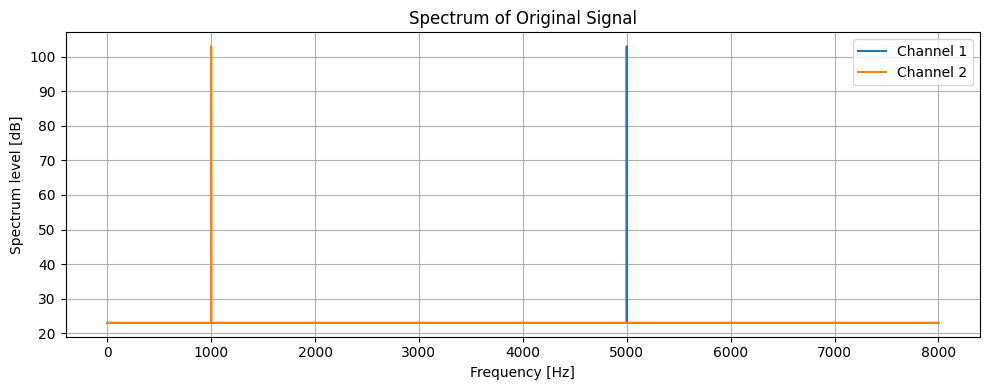

In [9]:
# Perform Fourier transform for spectral analysis
signal.fft().plot(title="Spectrum of Original Signal")

/home/vscode/.venv/lib/python3.10/site-packages/librosa/core/convert.py:1870: RuntimeWarning: divide by zero encountered in log10
  + 2 * np.log10(f_sq)


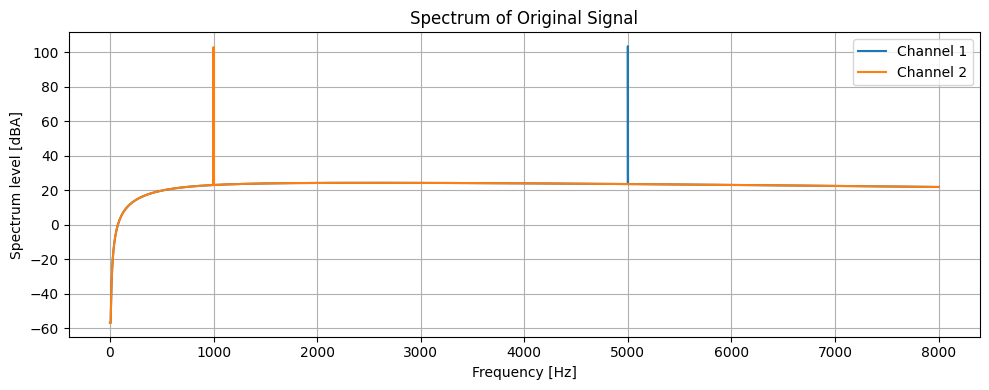

In [10]:
signal.fft().plot(title="Spectrum of Original Signal", Aw=True)

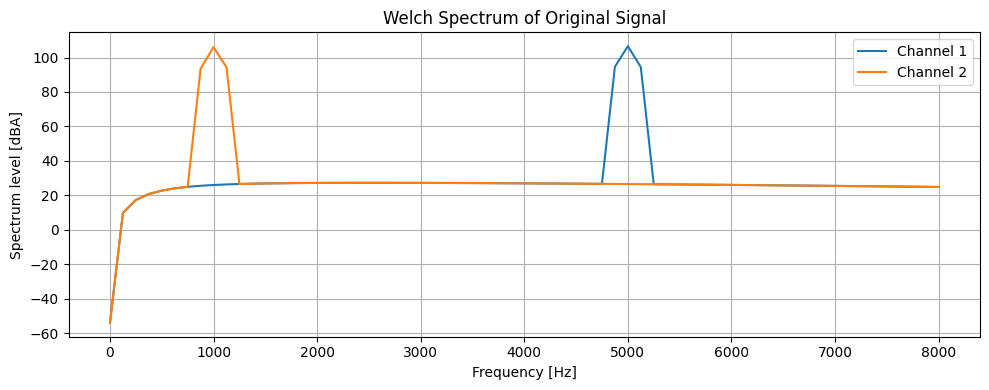

In [11]:
signal.welch(win_length=128).plot(title="Welch Spectrum of Original Signal", Aw=True)

(<Axes: title={'center': 'Channel 1'}, xlabel='Center frequency [Hz]', ylabel='Spectrum level [dBr]'>,
 array([19.99713924, 19.99713924, 19.99713924, 19.99713924, 19.99713924,
        19.99713924, 26.06709937, 27.06999513, 28.074586  , 29.08186567,
        30.09341283, 31.11173967, 32.14085595, 33.18719667, 34.26119515,
        35.38010822, 36.57365905, 37.89757035, 39.47596472, 41.67897356,
        45.93275142, 56.19096183, 77.63026614, 99.99713924, 85.79329185]))

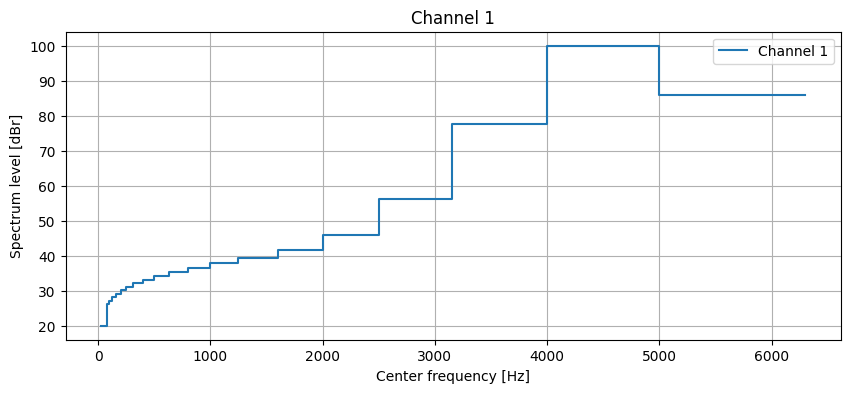

In [12]:
signal[0].noct_spectrum(fmin=25, fmax=6000).plot()

(<Axes: title={'center': 'Channel 1'}, xlabel='Center frequency [Hz]', ylabel='Spectrum level [dBrA]'>,
 array([-24.81894518, -19.52751062, -14.53813179, -10.27413297,
         -6.22231746,  -2.39757428,   6.92466689,  10.88242333,
         14.83188771,  18.23609172,  21.41958788,  24.46874981,
         27.36756919,  29.9398651 ,  32.35311021,  34.58577587,
         36.57400352,  38.47400277,  40.46921146,  42.88072023,
         47.20376458,  57.39245406,  78.59391149, 100.55162915,
         85.67781165]))

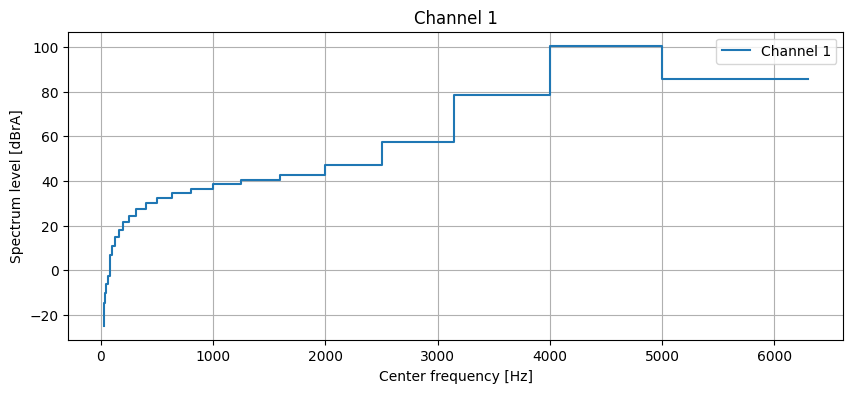

In [13]:
signal[0].noct_spectrum(fmin=25, fmax=6000).plot(Aw=True)

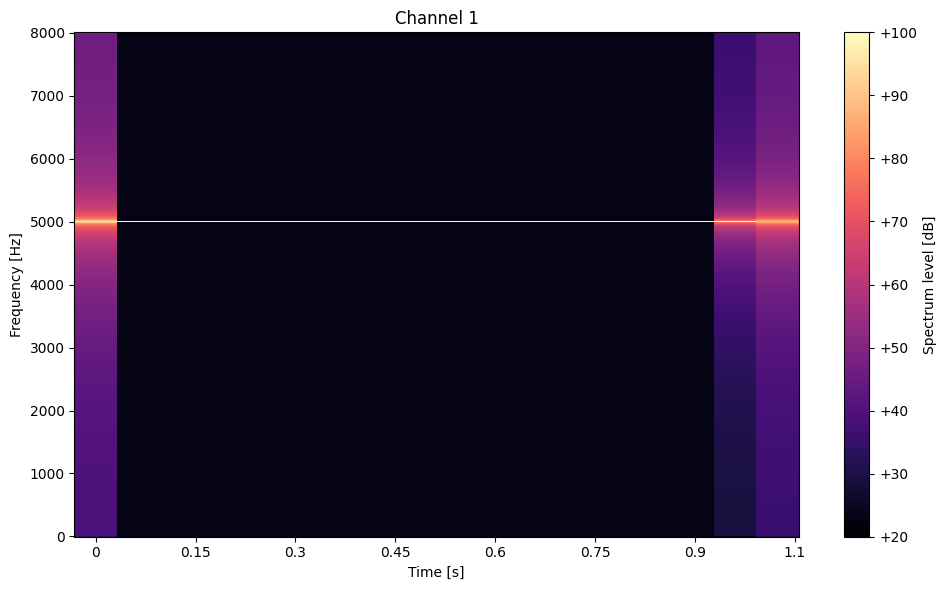

np.float64(103.01029995664042)

In [14]:
ax, spec = signal[0].stft().plot(vmin=20, vmax=100)
spec.max()

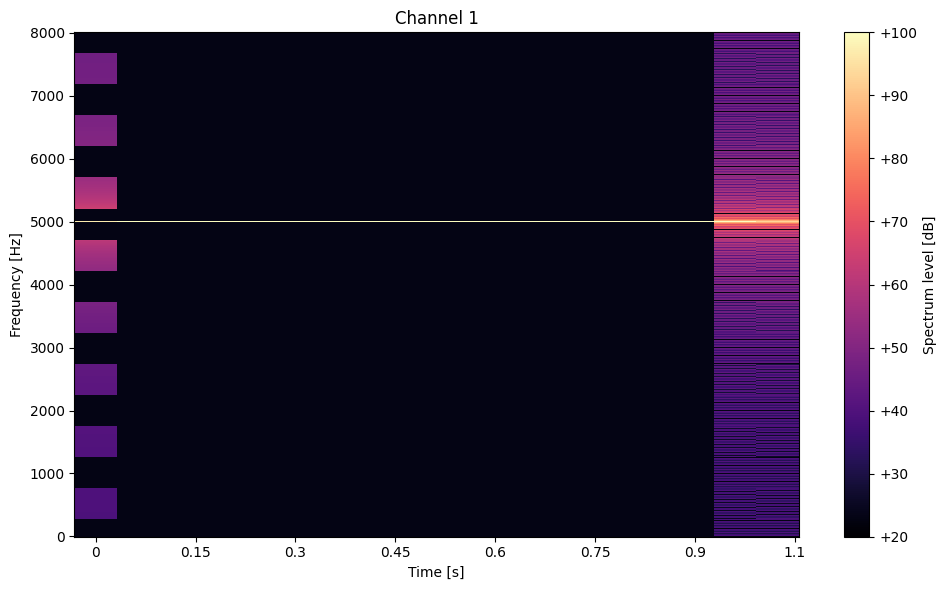

np.float64(103.0102999566401)

In [15]:
ax, spec = signal[0].stft(window="boxcar").plot(vmin=20, vmax=100)
spec.max()